In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import os

In [2]:
df_cars = pd.read_csv('CarPrice_Assignment.csv')
df_cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df_cars.drop("car_ID", inplace = True, axis =1)
df_cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
print (df_cars.shape)

# to select some useful features that would be needed for the regression 
print(df_cars.info())



(205, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    

In [5]:
print(df_cars["cylindernumber"].unique())
print(df_cars["fueltype"].unique())
print(df_cars["aspiration"].unique())
print(df_cars["enginelocation"].unique())
print(df_cars["drivewheel"].unique())
print(df_cars["enginetype"].unique())
print(df_cars["aspiration"].unique())
print(df_cars["carbody"].unique())

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['gas' 'diesel']
['std' 'turbo']
['front' 'rear']
['rwd' 'fwd' '4wd']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['std' 'turbo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


In [6]:
df_cars.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\l

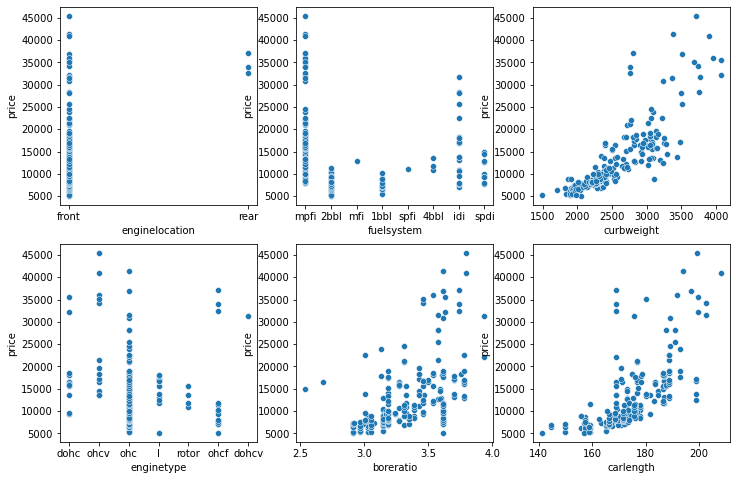

In [7]:
# catx = ['fueltype', 'drivewheel', 'enginelocation', 'fuelsystem', 'curbweight', 'enginetype', 'boreratio', 'carlength', 'wheelbase', 'cylindernumber', 'stroke', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
catt = ['enginelocation', 'fuelsystem', 'curbweight', 'enginetype', 'boreratio', 'carlength', 'highwaympg']
y = df_cars['price']


import seaborn as sns

def ScatterPlot(catt):
    fig, axis = plt.subplots(len(catt)//3, 3, figsize =(12, 8))
    
    index = 0
    for i in range(len(catt)//3):
        for j in range(3):
            
            ax = sns.scatterplot(catt[index], y, data = df_cars, ax = axis[i][j])
#             if catt[index] in ["enginelocation", "cylindernumber"]:
                
#                 for item in ax.get_xtickslabels:
#                     item.set_rotation(15)
#             for p in ax.patches:
#                 height = p.get_height()
#                 ax.text(p.get_x()+p.get_width()/2.,
#                         height + 3,
#                         '{:1.2f}%'.format(height/len(df)*100),
#                         ha="center") 
            index += 1
ScatterPlot(catt)

<AxesSubplot:xlabel='enginesize', ylabel='price'>

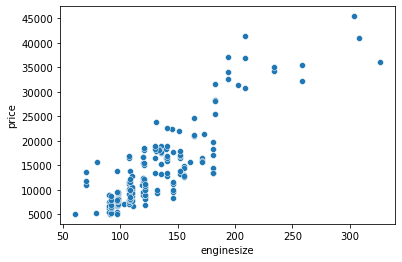

In [8]:
import seaborn as sns

sns.scatterplot(x ='enginesize', y='price', data = df_cars)

In [9]:
df_cars.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


<AxesSubplot:xlabel='wheelbase', ylabel='price'>

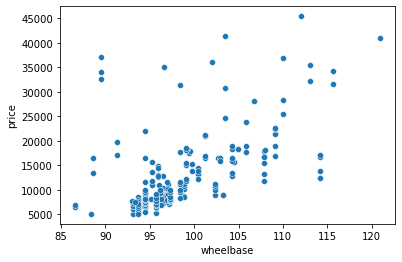

In [10]:
sns.scatterplot(x ='wheelbase', y='price', data = df_cars)

In [11]:
bins = np.linspace(min(df_cars["horsepower"]), max(df_cars["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df_cars['horsepower-binned'] = pd.cut(df_cars['horsepower'], bins, labels=group_names, include_lowest=True )
df_cars[['horsepower','horsepower-binned']].head()


,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


Text(0.5, 1.0, 'horsepower bins')

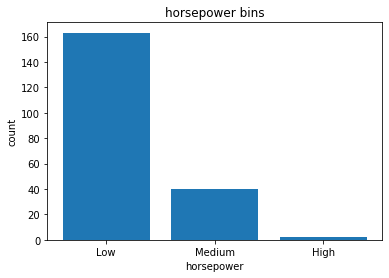

In [12]:
plt.bar(group_names, df_cars["horsepower-binned"].value_counts())


plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [13]:
# df_cars.isnull()

In [14]:
df = df_cars[['fueltype', 'drivewheel', 'enginelocation', 'fuelsystem', 'curbweight', 'enginetype', 'boreratio', 'carlength', 'wheelbase', 'cylindernumber', 'stroke', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

df

,fueltype,drivewheel,enginelocation,fuelsystem,curbweight,enginetype,boreratio,carlength,wheelbase,cylindernumber,stroke,enginesize,horsepower,peakrpm,citympg,highwaympg
0,gas,rwd,front,mpfi,2548,dohc,3.47,168.8,88.6,four,2.68,130,111,5000,21,27
1,gas,rwd,front,mpfi,2548,dohc,3.47,168.8,88.6,four,2.68,130,111,5000,21,27
2,gas,rwd,front,mpfi,2823,ohcv,2.68,171.2,94.5,six,3.47,152,154,5000,19,26
3,gas,fwd,front,mpfi,2337,ohc,3.19,176.6,99.8,four,3.40,109,102,5500,24,30
4,gas,4wd,front,mpfi,2824,ohc,3.19,176.6,99.4,five,3.40,136,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,rwd,front,mpfi,2952,ohc,3.78,188.8,109.1,four,3.15,141,114,5400,23,28
201,gas,rwd,front,mpfi,3049,ohc,3.78,188.8,109.1,four,3.15,141,160,5300,19,25
202,gas,rwd,front,mpfi,3012,ohcv,3.58,188.8,109.1,six,2.87,173,134,5500,18,23
203,diesel,rwd,front,idi,3217,ohc,3.01,188.8,109.1,six,3.40,145,106,4800,26,27


In [15]:
#Use one hot encoding to convert categorical variables to continous or numerical variable

from sklearn.preprocessing import LabelEncoder, StandardScaler
lab=LabelEncoder()
df['fuelsystem']=lab.fit_transform(df['fuelsystem'])
df['cylindernumber']=lab.fit_transform(df['cylindernumber'])
df['enginetype']=lab.fit_transform(df['enginetype'])
df['enginelocation']=lab.fit_transform(df['enginelocation'])
df['drivewheel']=lab.fit_transform(df['drivewheel'])
df['fueltype']=lab.fit_transform(df['fueltype'])






# df['fueltype']= df.fueltype.map({'gas': 0, 'diesel':1})
# df['drivewheel'] = df['drivewheel'].replace({'rwd': 0, 'fwd':1, '4wd': 2})
# df['enginelocation'] = df.enginelocation.map({'front':0, 'back':1})
# df['enginetype'] = df['enginetype'].replace({'dohc':0, 'ohcv':1, 'ohc':2, 'l': 3, 'rotor':4, 'ohcf': 5, 'dohcv':6})
# df['fuelsystem'] = df['fuelsystem'].replace({'mpfi': 0,'2bbl':1, 'mfi':2, '1bbl':3, 'spfi':4, '4bbl':5, 'idi':6, 'spdi':7})
# df['cylindernumber'] = df['cylindernumber'].replace({'two':0, 'three': 1, 'four':2, 'five': 3, 'six':4, 'eight':5, 'twelve':6})


<ipython-input-15-e6d80845adb8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuelsystem']=lab.fit_transform(df['fuelsystem'])
<ipython-input-15-e6d80845adb8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cylindernumber']=lab.fit_transform(df['cylindernumber'])
<ipython-input-15-e6d80845adb8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [16]:
df.head()

,fueltype,drivewheel,enginelocation,fuelsystem,curbweight,enginetype,boreratio,carlength,wheelbase,cylindernumber,stroke,enginesize,horsepower,peakrpm,citympg,highwaympg
0,1,2,0,5,2548,0,3.47,168.8,88.6,2,2.68,130,111,5000,21,27
1,1,2,0,5,2548,0,3.47,168.8,88.6,2,2.68,130,111,5000,21,27
2,1,2,0,5,2823,5,2.68,171.2,94.5,3,3.47,152,154,5000,19,26
3,1,1,0,5,2337,3,3.19,176.6,99.8,2,3.40,109,102,5500,24,30
4,1,0,0,5,2824,3,3.19,176.6,99.4,1,3.40,136,115,5500,18,22


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [19]:
X = df
y = df_cars["price"]

print("The size of X is:", X.shape)
print("The size of y is:", y.shape)

The size of X is: (205, 16)
The size of y is: (205,)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enginesize'>

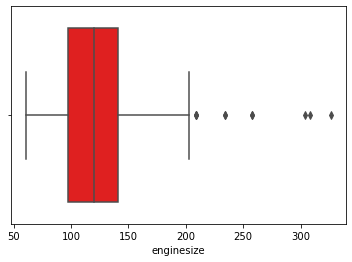

In [20]:
# # import missingno as msno
# # msno.dendrogram(df)

# # check for outliers
sns.boxplot(df['enginesize'], color='red')

<ipython-input-21-ab357a89266d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['enginesize']=df['enginesize'].rank()
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enginesize'>

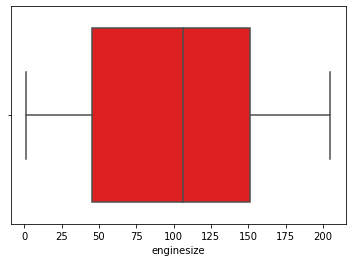

In [21]:
df['enginesize']=df['enginesize'].rank()
sns.boxplot(df['enginesize'],color='red')

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df1 = scaler.fit_transform(df)
df = df1
df

array([[ 0.32879797,  1.21333041, -0.12186667, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [ 0.32879797,  1.21333041, -0.12186667, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [ 0.32879797,  1.21333041, -0.12186667, ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [ 0.32879797,  1.21333041, -0.12186667, ...,  0.78785546,
        -1.10624102, -1.12833203],
       [-3.04138127,  1.21333041, -0.12186667, ..., -0.68328649,
         0.11959362, -0.54605874],
       [ 0.32879797,  1.21333041, -0.12186667, ...,  0.57769233,
        -0.95301169, -0.83719538]])

In [23]:
X = df
y = df_cars["price"]

print("The size of X is:", X.shape)
print("The size of y is:", y.shape)

The size of X is: (205, 16)
The size of y is: (205,)


In [24]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (164, 16) (164,)
Test set: (41, 16) (41,)


In [25]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.coef_)
print(regr.score)

[  -55.84058417  1185.37613445  1751.813848    -442.21218009
  3859.9691627    999.43685468  -870.3975018   -133.74357575
   900.53600718 -1243.42220062  -107.25684213  -787.48550211
  3514.36629145  -347.97743133   224.62054816  -161.41483147]
<bound method RegressorMixin.score of LinearRegression()>


In [26]:
yhat = regr.predict(X_test)
yhat

array([ 6636.56397014, 26912.85266389,  5686.56474169, 23686.0207456 ,
       10215.6894561 ,  8308.63815301,  5774.55733854, 11732.85484397,
       10023.99509795, 15480.46946468, 10274.06577058,  9268.24638394,
       14591.06734707, 17345.23943446, 19032.50476396,  6265.0825965 ,
        6771.68760296,  7843.50527854, 17866.06443208,  6466.74968865,
       10766.61911366, 15940.63048099,  9801.42804879,  8407.95485005,
       15193.2628822 , 10870.81635252, 17170.75132568,  9801.42804879,
       11679.45626457, 13728.71794745, 22011.99910184,  7310.21753156,
       34288.05046754, 10052.19715861, 20787.98497499, 17519.52870168,
        6420.48193936, 25567.18713096, 10906.19182114, 18151.90311803,
       10027.0448997 ])

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, make_scorer
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV

kfold = KFold(n_splits = 5)
score=cross_val_score(regr,X,y,cv=kfold)
print(score)


print(mean_squared_error(y_test, yhat))
print(r2_score(y_test, yhat))

[ 0.5686248   0.7160113  -0.07005466  0.67138484  0.26213795]
16208226.298505204
0.7832910367415273


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV

mod=RandomForestRegressor(n_estimators=100)
model=make_pipeline(mod)
print(model)

kfold=KFold(n_splits=5)
model.fit(X,y)
score=cross_val_score(model,X,y,cv=kfold)
print(score)
yhat2=model.predict(X_test)
print(r2_score(y_test,yhat2))
print(mean_squared_error(y_test,yhat2))
print(mean_squared_log_error(y_test,yhat2))



Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])
[0.85330087 0.93549542 0.21398218 0.89406124 0.63844713]
0.9915966795657148
628506.1642572441
0.0032842422706151992


In [30]:
print(yhat2)

[ 7527.68       33891.98        6038.52916667 39120.275
  9182.59333333  9613.36333333  6983.905       9114.52
  8134.62       13296.77        9419.32333333  7774.51
 11797.55       15501.37       14052.31        6187.63
  7793.53        8800.16       16406.17        5540.115
 10784.63       14537.65167     9538.515       9240.26
 18382.39668     7997.25       16140.38        9538.515
  9540.31       15710.9        18877.12        6534.155
 37228.955       9400.95333333 14313.6        18654.255
  6184.86       37565.415      10432.60666667 17047.7
 11664.66428571]


In [66]:
# git clone --recursive https://github.com/dmlc/xgboost
    
# cd xgboost
# make -j4

# cd python-package
# sudo python setup.py install


# # # git submodule init
# # # git submodule update

# # ! conda install -c conda-forge xgboost
# ! conda-forge install xgboost



'conda-forge' is not recognized as an internal or external command,
operable program or batch file.


In [73]:
# conda install -c anaconda py-xgboost

In [72]:
# conda install py-xgboost

In [ ]:
# ! pip install lightgbm

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [ ]:
mod=LGBMRegressor(n_estimators=40)
model=make_pipeline(mod)
model.fit(X,y)
print(model)
kfold=KFold(n_splits=5)
score=cross_val_score(model,X,y,cv=kfold)
print(score)
yhat3=model.predict(X_test)
print(r2_score(y_test,yhat3))
print(mean_squared_error(y_test,yhat3))
print(mean_squared_log_error(y_test,yhat3))

In [ ]:
yhat22=model.predict(X_train)
print(r2_score(y_train,yhat22))
print(mean_squared_error(y_test,yhat2))
print(mean_squared_log_error(y_test,yhat2))

In [ ]:
yhat33=model.predict(X_train)
print(r2_score(y_train,yhat33))
print(mean_squared_error(y_train,yhat33))
print(mean_squared_log_error(y_train,yhat33))

In [ ]:
# xgb1 = XGBRegressor()
# parameters = {'n_estimators': [500]}

# xgb_grid = GridSearchCV(xgb1,parameters,cv = 2)

# xgb_grid.fit(X,y)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)
# yhat4=xgb_grid.predict(X_test)
# print(r2_score(y_test,yhat4))
# print(mean_squared_error(y_test,yhat4))
# print(mean_squared_log_error(y_test,yhat4))

In [ ]:
# import pickle

# pkl_path = "./Car.pkl"
# with open(pkl_path, "wb") as f:
#     pickle.dump(model, f)

In [ ]:
# import pickle
# pkl_path = './Car.pkl'
# with open(pkl_path, 'rb') as f:
#     model = pickle.load(f)